In [32]:
import importlib
import PreProcessMetadata
import PreProcess_NLP
import KG
import pathlib
from rdflib import Graph, Literal, RDF, URIRef
from rdflib import Namespace
from rdflib.namespace import DC, FOAF, RDF, XSD

In [33]:
importlib.reload(KG)

<module 'KG' from 'C:\\Users\\Jana\\LabCode\\KG.py'>

In [2]:
#Angabe allgemeiner Parameter zum Ausführen der Funktionen (einmalig)
pdf_path = ('C:/Users/Jana/LabCode/PDF')
p = pathlib.Path(pdf_path)
files_path = list(p.glob('*.pdf'))

pdf_path_conference = ('C:/Users/Jana/LabCode/AimsAndScope')
p_conference = pathlib.Path(pdf_path_conference)
files_path_conference = list(p_conference.glob('*.pdf'))

path = 'C:/Users/Jana/LabCode/'

In [35]:
#Aufrufe aus PreProcessMetadata
df_pdf_meta = PreProcessMetadata.read_paper_meta(path) #Einlesen der PDF's

In [34]:
#muss nur ausgeführt werden, falls neue paper/Konferenzen dazu kommen
PreProcessMetadata.write_paper_meta(path, df_pdf_meta) #Schreiben der Metadaten in PDF (paper)
PreProcessMetadata.write_conference_meta(path, df_pdf_meta) #Schreiben der Metadaten in PDF (Konferenzen)

In [4]:
#Aufrufe aus PreProcess_NLP
corpus = PreProcess_NLP.build_corpus(files_path) #Bildung des Textcorpus aus papern
conference_corpus = PreProcess_NLP.build_conference(files_path_conference) #Bildung des Textcorpus aus Konferenzen
keyword_list, conference_list = PreProcess_NLP.generate_keywords(corpus, conference_corpus) #Generierung keywords

In [36]:
#Initialerstellung Graph
G_KG = Graph()
G_KG_ns = Namespace('http://G_KG.org/')
G_KG.bind('G_KG_ns',G_KG_ns,override=True)
G_KG.bind('dc',DC,override=True)
G_KG.bind('FOAF',FOAF,override=True)
G_KG.bind('rdf',RDF,override=True)
G_KG.bind('xsd',XSD,override=True)
G_KG = KG.get_entity_rel(df_pdf_meta, G_KG, keyword_list, conference_list, G_KG_ns)#Erstellung Inhalt Graph
G_KG.serialize(destination="G_KG.ttl")

<Graph identifier=Nd1aff854ad9440fc812a26c4ddfbacfa (<class 'rdflib.graph.Graph'>)>

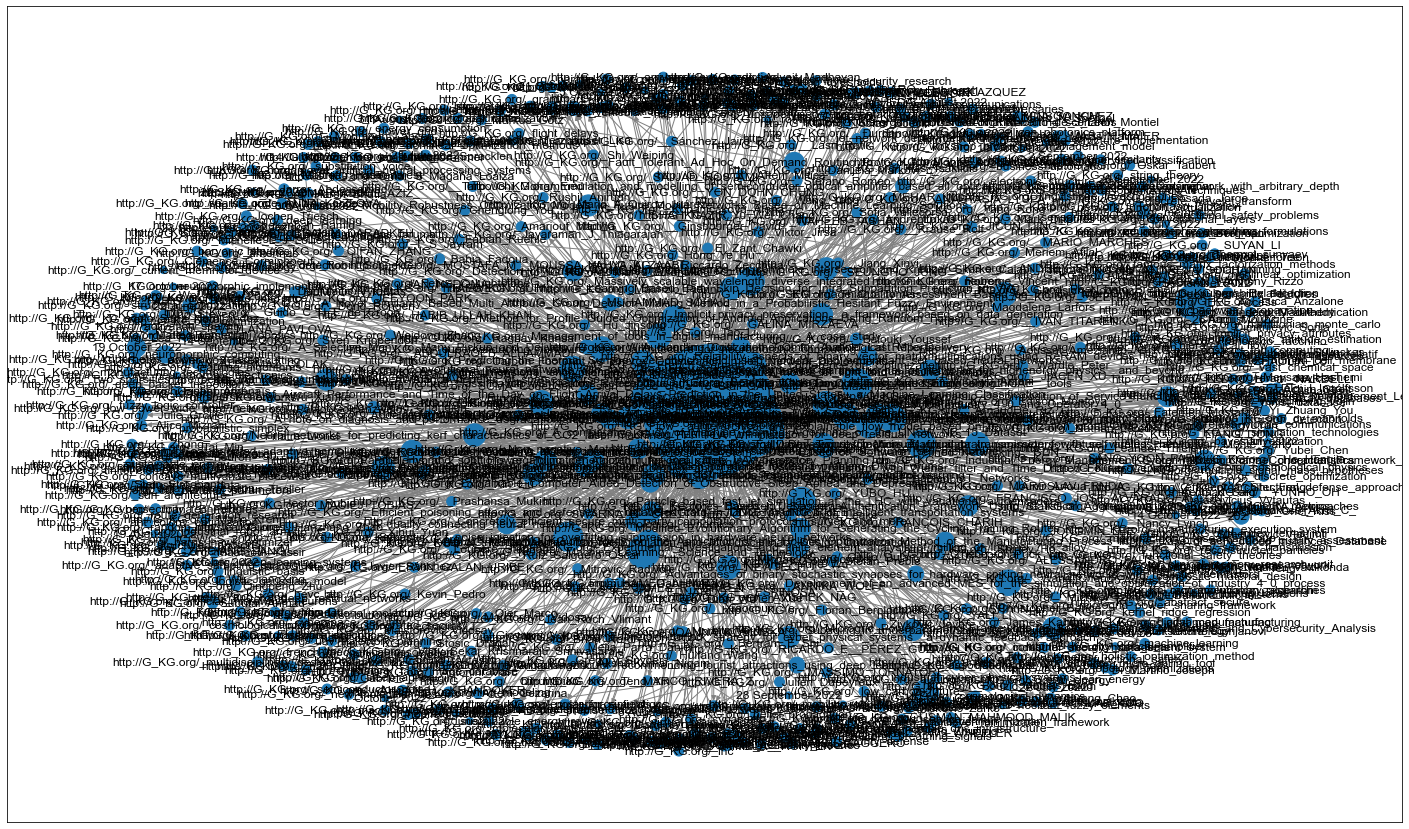

In [6]:
#Anzeigen des Graphen
KG.show_graph(G_KG)

In [7]:
#Suche ob bestimmte Subjekte, Prädiakte oder Objekte im Graph enthalten sind.
sub = G_KG_ns._Audiogram_Digitization_Tool_for_Audiological_Reports
obj = ''
praed = ''
if (sub, None, None) in G_KG:
    print("This graph contains triples about", sub,obj,praed)

This graph contains triples about http://G_KG.org/_Audiogram_Digitization_Tool_for_Audiological_Reports  


In [60]:
#Abfrage Variable (mit voranstehendem ?) ist frei wählbar und gibt die Ausgabevariable an
#Abfragereihenfolge: Subjekt Prädikat Objekt

query = """
SELECT ?Autor
WHERE {
  	?paper_1 dc:subject G_KG_ns:_deep_learning .  
    ?paper_2 dc:subject G_KG_ns:_deep_learning_systems .  
    
    {?paper_1 dc:creator ?Autor}
    UNION
    {?paper_2 dc:creator ?Autor}.
    }
"""

erg = G_KG.query(query)
print('Ergebnisliste:')
count=0
for row in erg:
    count=count+1
    print(f'{row.Autor}')
print('Anzahl Ergebnisse:' ,count)

Ergebnisliste:
http://G_KG.org/_Carlo_Lucibello
http://G_KG.org/_Fabrizio_Pittorino
http://G_KG.org/_Gabriele_Perugini
http://G_KG.org/_Riccardo_Zecchina
http://G_KG.org/_Kevin_Hunter
http://G_KG.org/__Lawrence_Spracklen
http://G_KG.org/__Subutai_Ahmad
Anzahl Ergebnisse: 7


In [53]:
query = """
SELECT *
WHERE {
    ?paper dc:date ?date .
    FILTER(?date > '2022-10-01'^^xsd:date) .
    }
"""

erg = G_KG.query(query)
print('Ergebnisse:')
count=
for row in erg:
    count=count+1
    print(f'{row.paper}' ' Datum: ' f'{row.date}')
print('Anzahl Ergebnisse:' ,count)

Ergebnisse:
http://G_KG.org/_Advanced_Mobility_Robustness_Optimization_Models_in_Future_Mobile_Networks_Based_on_Machine_Learning_Solutions Datum: 2022-10-19
http://G_KG.org/_Audiogram_Digitization_Tool_for_Audiological_Reports Datum: 2022-10-19
http://G_KG.org/_A_Comprehensive_Study_of_DNS_Operational_Issues_by_Mining_DNS_Forums Datum: 2022-10-19
http://G_KG.org/_A_Selective_Many_to_Many_Pickup_and_Delivery_Problem_With_Handling_Cost_in_the_Omni_Channel_Last_Mile_Delivery Datum: 2022-10-19
http://G_KG.org/_Detection_of_Cluster_Anomalies_With_ML_Techniques Datum: 2022-10-19
http://G_KG.org/_SMRETO__Stable_Matching_for_Reliable_and_Efficient_Task_Offloading_in_Fog_Enabled_IoT_Networks Datum: 2022-10-19
http://G_KG.org/_The_Metaverse_and_Beyond__Implementing_Advanced_Multiverse_Realms_With_Smart_Wearables Datum: 2022-10-19
http://G_KG.org/_Improving_parametric_neural_networks_for_highenergy_physics__and_beyond_ Datum: 2022-10-05
http://G_KG.org/_Modified_Evolutionary_Algorithm_for_Genera

In [67]:
query = """
SELECT DISTINCT ?autor
WHERE {  
    ?con dc:subject G_KG_ns:_cyber_security .
    ?paper dc:publisher ?con .
    ?paper dc:creator ?autor .
    }
"""

erg = G_KG.query(query)
print('Ergebnisse:')
count=0
for row in erg:
    count=count+1
    print(f'{row.autor}' )
print('Anzahl Ergebnisse:' ,count)

Ergebnisse:
http://G_KG.org/_Feng_Dengguo
http://G_KG.org/__Yang_Kang
http://G_KG.org/_Wu_JiangXing
http://G_KG.org/_Shi_Weiping
http://G_KG.org/__Jiang_Xinyi
http://G_KG.org/__Hu_Jinsong
http://G_KG.org/__Abdelgader_Abdeldime_Mohamed_Salih
http://G_KG.org/__Teng_Yin
http://G_KG.org/__Wang_Yang
http://G_KG.org/__He_Hangjia
http://G_KG.org/__Dong_Rongen
http://G_KG.org/__Shu_Feng
http://G_KG.org/__Wang_Jiangzhou
http://G_KG.org/_Li_Zhong
http://G_KG.org/__Wu_Xianke
http://G_KG.org/__Jiang_Changjun
http://G_KG.org/_Gao_Sheng
http://G_KG.org/__Zhang_Hao
http://G_KG.org/__Wang_Zhuping
http://G_KG.org/__Huang_Chao
http://G_KG.org/_Yang_Rong
http://G_KG.org/__Hu_Aiqun
http://G_KG.org/_Ding_Steven_X_
http://G_KG.org/_Yang_Qing
http://G_KG.org/__Wang_Cheng
http://G_KG.org/__Hu_Teng
http://G_KG.org/__Chen_Xue
Anzahl Ergebnisse: 27
